In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
dados = pd.read_csv("Dados\PETR4.SA.csv")
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-27,25.719999,26.530001,24.889999,25.299999,25.299320,100112100
1,2020-02-28,25.160000,25.559999,24.620001,25.340000,25.339321,89095300
2,2020-03-02,25.500000,26.750000,25.480000,26.530001,26.529289,71596400
3,2020-03-03,26.570000,27.480000,25.760000,26.049999,26.049301,86855700
4,2020-03-04,26.910000,26.940001,26.240000,26.889999,26.889278,42320500
5,2020-03-05,26.330000,26.670000,24.709999,25.290001,25.289322,69722300
6,2020-03-06,24.100000,24.129999,22.549999,22.830000,22.829388,138597600
7,2020-03-09,17.809999,18.230000,15.410000,16.049999,16.049568,254813800
8,2020-03-10,18.650000,18.650000,16.370001,17.559999,17.559528,170478000
9,2020-03-11,16.700001,17.129999,15.000000,15.850000,15.849575,132482400


In [3]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-27,25.719999,26.530001,24.889999,25.299999,25.299320,100112100
1,2020-02-28,25.160000,25.559999,24.620001,25.340000,25.339321,89095300
2,2020-03-02,25.500000,26.750000,25.480000,26.530001,26.529289,71596400
3,2020-03-03,26.570000,27.480000,25.760000,26.049999,26.049301,86855700
4,2020-03-04,26.910000,26.940001,26.240000,26.889999,26.889278,42320500


In [4]:
dados.columns = ["Data", "Open", "Alta", "Baixa", "Fechada", "Adj Fechar", "Volume"]
dados.head()

,Data,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2020-02-27,25.719999,26.530001,24.889999,25.299999,25.299320,100112100
1,2020-02-28,25.160000,25.559999,24.620001,25.340000,25.339321,89095300
2,2020-03-02,25.500000,26.750000,25.480000,26.530001,26.529289,71596400
3,2020-03-03,26.570000,27.480000,25.760000,26.049999,26.049301,86855700
4,2020-03-04,26.910000,26.940001,26.240000,26.889999,26.889278,42320500


In [5]:
dados.tail()

,Data,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
34,2020-04-16,16.670000,16.760000,15.530000,15.720000,15.719579,115633300
35,2020-04-17,15.750000,16.129999,15.560000,16.129999,16.129566,116733000
36,2020-04-20,15.480000,16.330000,15.340000,15.950000,15.949572,133739400
37,2020-04-22,15.850000,16.750000,15.780000,16.750000,16.749550,114967100
38,2020-04-23,17.200001,17.430000,16.620001,16.950001,16.950001,94759000


In [6]:
dados.shape

(39, 7)

In [7]:
dados.describe()

,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
count,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01
mean,16.926667,17.510000,16.130769,16.779743,16.779305,1.285016e+08
std,4.572590,4.503169,4.518256,4.467888,4.467769,4.176010e+07
min,11.070000,12.180000,10.850000,11.290000,11.289697,4.232050e+07
25%,13.525000,14.320000,12.915000,13.685000,13.684634,1.007590e+08
50%,16.040001,16.469999,15.340000,15.850000,15.849575,1.239342e+08
75%,17.505000,17.880001,16.450000,16.940001,16.939774,1.503822e+08
max,26.910000,27.480000,26.240000,26.889999,26.889278,2.548138e+08


In [8]:
dados.Alta

0     26.530001
1     25.559999
2     26.750000
3     27.480000
4     26.940001
5     26.670000
6     24.129999
7     18.230000
8     18.650000
9     17.129999
10    13.860000
11    15.400000
12    14.100000
13    13.840000
14    12.270000
15    13.070000
16    13.500000
17    12.180000
18    13.540000
19    14.790000
20    15.190000
21    13.690000
22    13.740000
23    14.540000
24    14.550000
25    16.549999
26    16.360001
27    16.100000
28    17.070000
29    17.530001
30    18.690001
31    17.090000
32    17.299999
33    16.469999
34    16.760000
35    16.129999
36    16.330000
37    16.750000
38    17.430000
Name: Alta, dtype: float64

In [9]:
dados.Baixa

0     24.889999
1     24.620001
2     25.480000
3     25.760000
4     26.240000
5     24.709999
6     22.549999
7     15.410000
8     16.370001
9     15.000000
10    11.080000
11    12.700000
12    12.550000
13    13.000000
14    10.870000
15    10.850000
16    11.830000
17    11.280000
18    12.280000
19    12.830000
20    13.810000
21    13.250000
22    12.830000
23    13.600000
24    13.320000
25    15.010000
26    14.930000
27    15.180000
28    16.340000
29    16.400000
30    16.500000
31    16.330000
32    16.610001
33    15.860000
34    15.530000
35    15.560000
36    15.340000
37    15.780000
38    16.620001
Name: Baixa, dtype: float64

In [10]:
dados.Fechada

0     25.299999
1     25.340000
2     26.530001
3     26.049999
4     26.889999
5     25.290001
6     22.830000
7     16.049999
8     17.559999
9     15.850000
10    12.600000
11    15.400000
12    13.090000
13    13.000000
14    11.290000
15    12.210000
16    12.000000
17    11.500000
18    13.250000
19    14.320000
20    14.390000
21    13.300000
22    13.380000
23    13.990000
24    14.300000
25    15.510000
26    15.340000
27    15.770000
28    16.400000
29    17.320000
30    16.820000
31    16.930000
32    16.730000
33    16.379999
34    15.720000
35    16.129999
36    15.950000
37    16.750000
38    16.950001
Name: Fechada, dtype: float64

In [11]:
sorted(dados['Alta'].unique())

[12.18,
 12.27,
 13.07,
 13.5,
 13.54,
 13.69,
 13.74,
 13.84,
 13.86,
 14.1,
 14.54,
 14.55,
 14.79,
 15.19,
 15.4,
 16.1,
 16.129998999999998,
 16.33,
 16.360001,
 16.469998999999998,
 16.549999,
 16.75,
 16.76,
 17.07,
 17.09,
 17.129998999999998,
 17.299999,
 17.43,
 17.530001000000002,
 18.23,
 18.65,
 18.690001000000002,
 24.129998999999998,
 25.559998999999998,
 26.530001000000002,
 26.67,
 26.75,
 26.940001000000002,
 27.48]

In [12]:
sorted(dados['Fechada'].unique())

[11.29,
 11.5,
 12.0,
 12.21,
 12.6,
 13.0,
 13.09,
 13.25,
 13.3,
 13.38,
 13.99,
 14.3,
 14.32,
 14.39,
 15.34,
 15.4,
 15.51,
 15.72,
 15.77,
 15.85,
 15.95,
 16.049999,
 16.129998999999998,
 16.379998999999998,
 16.4,
 16.73,
 16.75,
 16.82,
 16.93,
 16.950001,
 17.32,
 17.559998999999998,
 22.83,
 25.290001,
 25.299999,
 25.34,
 26.049999,
 26.530001000000002,
 26.889999]

# Media, mediana, moda

**Mediana**

In [13]:
dados['Alta'].median()

16.469998999999998

In [14]:
dados['Baixa'].median()

15.34

In [15]:
dados["Fechada"].median()

15.85

**Média**

In [16]:
dados['Alta'].mean()

17.50999994871795

In [17]:
dados['Baixa'].mean()

16.130769256410254

In [18]:
dados["Fechada"].mean()

16.779743487179488

**Moda**

In [19]:
dados["Alta"].mode()

0     12.180000
1     12.270000
2     13.070000
3     13.500000
4     13.540000
5     13.690000
6     13.740000
7     13.840000
8     13.860000
9     14.100000
10    14.540000
11    14.550000
12    14.790000
13    15.190000
14    15.400000
15    16.100000
16    16.129999
17    16.330000
18    16.360001
19    16.469999
20    16.549999
21    16.750000
22    16.760000
23    17.070000
24    17.090000
25    17.129999
26    17.299999
27    17.430000
28    17.530001
29    18.230000
30    18.650000
31    18.690001
32    24.129999
33    25.559999
34    26.530001
35    26.670000
36    26.750000
37    26.940001
38    27.480000
dtype: float64

In [20]:
dados["Baixa"].mode()

0    12.83
dtype: float64

In [21]:
dados["Fechada"].mode()

0     11.290000
1     11.500000
2     12.000000
3     12.210000
4     12.600000
5     13.000000
6     13.090000
7     13.250000
8     13.300000
9     13.380000
10    13.990000
11    14.300000
12    14.320000
13    14.390000
14    15.340000
15    15.400000
16    15.510000
17    15.720000
18    15.770000
19    15.850000
20    15.950000
21    16.049999
22    16.129999
23    16.379999
24    16.400000
25    16.730000
26    16.750000
27    16.820000
28    16.930000
29    16.950001
30    17.320000
31    17.559999
32    22.830000
33    25.290001
34    25.299999
35    25.340000
36    26.049999
37    26.530001
38    26.889999
dtype: float64

# Analise de dados com Graficos 

**Analise de dados ações da Petrobras - 2020**

In [22]:
dados.corr()

,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
Open,1.000000,0.994874,0.987215,0.986709,0.986709,-0.433654
Alta,0.994874,1.000000,0.989952,0.992585,0.992585,-0.425061
Baixa,0.987215,0.989952,1.000000,0.993617,0.993617,-0.506231
Fechada,0.986709,0.992585,0.993617,1.000000,1.000000,-0.490650
Adj Fechar,0.986709,0.992585,0.993617,1.000000,1.000000,-0.490652
Volume,-0.433654,-0.425061,-0.506231,-0.490650,-0.490652,1.000000


In [23]:
dados.head()

,Data,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2020-02-27,25.719999,26.530001,24.889999,25.299999,25.299320,100112100
1,2020-02-28,25.160000,25.559999,24.620001,25.340000,25.339321,89095300
2,2020-03-02,25.500000,26.750000,25.480000,26.530001,26.529289,71596400
3,2020-03-03,26.570000,27.480000,25.760000,26.049999,26.049301,86855700
4,2020-03-04,26.910000,26.940001,26.240000,26.889999,26.889278,42320500


In [24]:
dados.describe(include='all')

,Data,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
count,39,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01
unique,39,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.926667,17.510000,16.130769,16.779743,16.779305,1.285016e+08
std,NaN,4.572590,4.503169,4.518256,4.467888,4.467769,4.176010e+07
min,NaN,11.070000,12.180000,10.850000,11.290000,11.289697,4.232050e+07
25%,NaN,13.525000,14.320000,12.915000,13.685000,13.684634,1.007590e+08
50%,NaN,16.040001,16.469999,15.340000,15.850000,15.849575,1.239342e+08
75%,NaN,17.505000,17.880001,16.450000,16.940001,16.939774,1.503822e+08


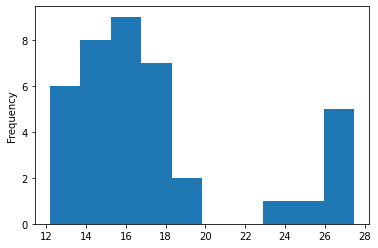

In [25]:
dados["Alta"].plot.hist()

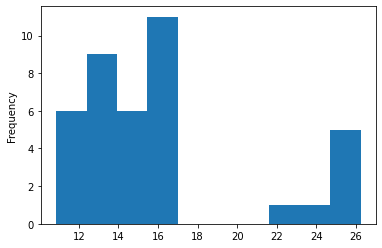

In [26]:
dados["Baixa"].plot.hist()

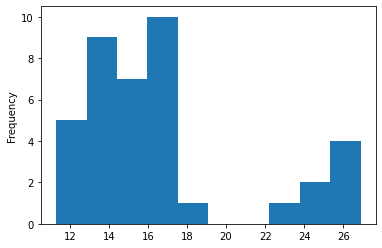

In [27]:
dados["Fechada"].plot.hist()

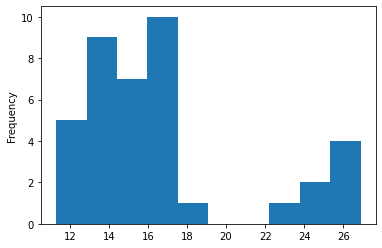

In [28]:
dados["Adj Fechar"].plot.hist()

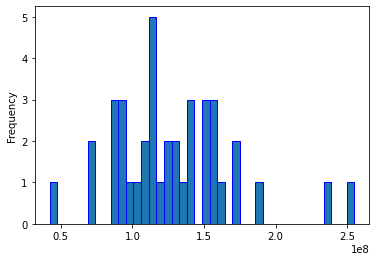

In [29]:
dados["Volume"].plot.hist(bins=40, edgecolor="Blue")

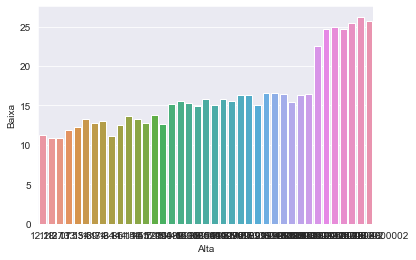

In [30]:
sns.set_style('darkgrid')

sns.barplot(x='Alta', y='Baixa', data=dados)

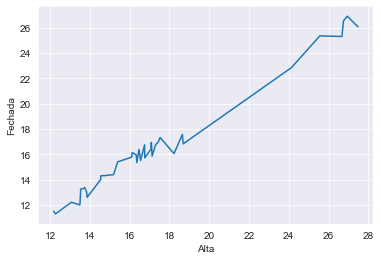

In [103]:
sns.lineplot(x="Alta", y="Fechada", data=dados)

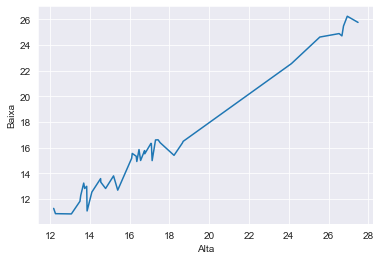

In [104]:
sns.lineplot(x="Alta", y="Baixa", data=dados)

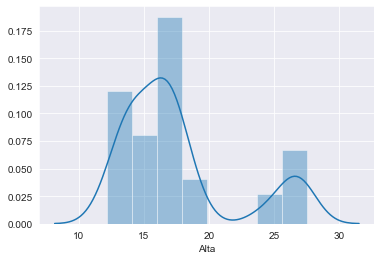

In [32]:
sns.distplot(dados["Alta"])

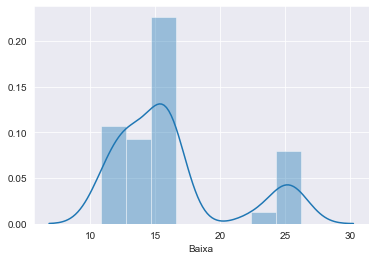

In [33]:
sns.distplot(dados["Baixa"])

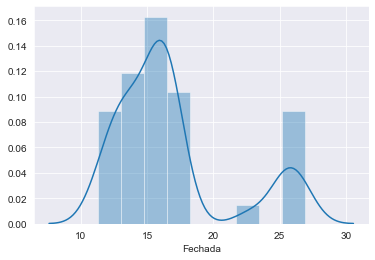

In [34]:
sns.distplot(dados['Fechada'])

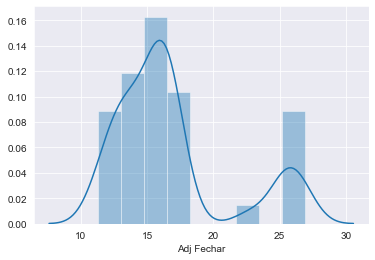

In [35]:
sns.distplot(dados['Adj Fechar'])

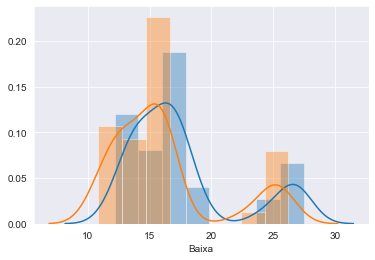

In [36]:
a1 = sns.distplot(dados["Alta"])
a2 = sns.distplot(dados["Baixa"])

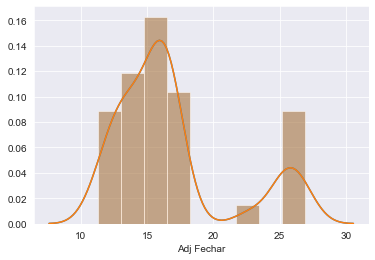

In [37]:
a3 = sns.distplot(dados["Fechada"])
a4 = sns.distplot(dados['Adj Fechar'])

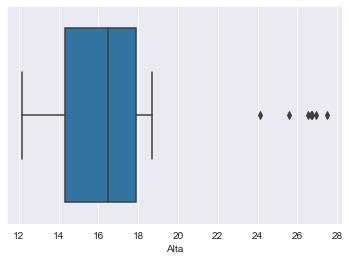

In [38]:
sns.boxplot(dados.Alta)

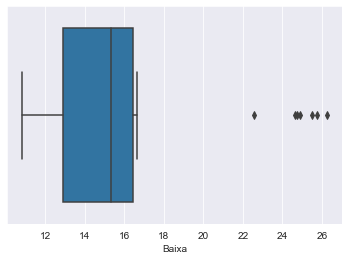

In [39]:
sns.boxplot(dados.Baixa)

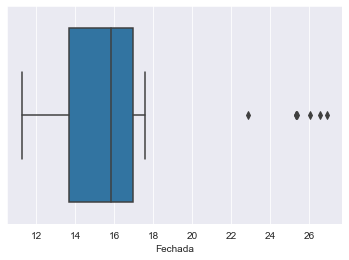

In [40]:
sns.boxplot(dados.Fechada)

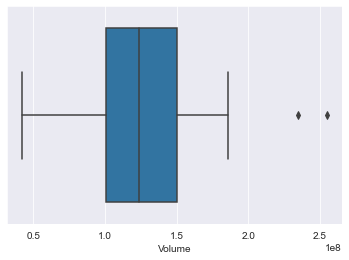

In [41]:
sns.boxplot(dados.Volume)

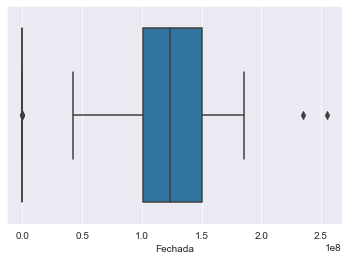

In [42]:
sns.boxplot(dados.Volume)
sns.boxplot(dados.Fechada)

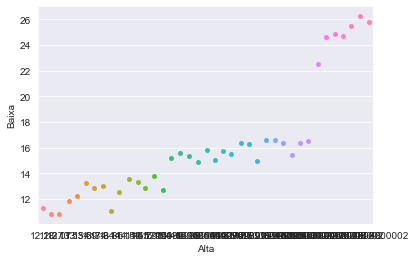

In [43]:
sns.stripplot(x='Alta', y='Baixa', data=dados) 

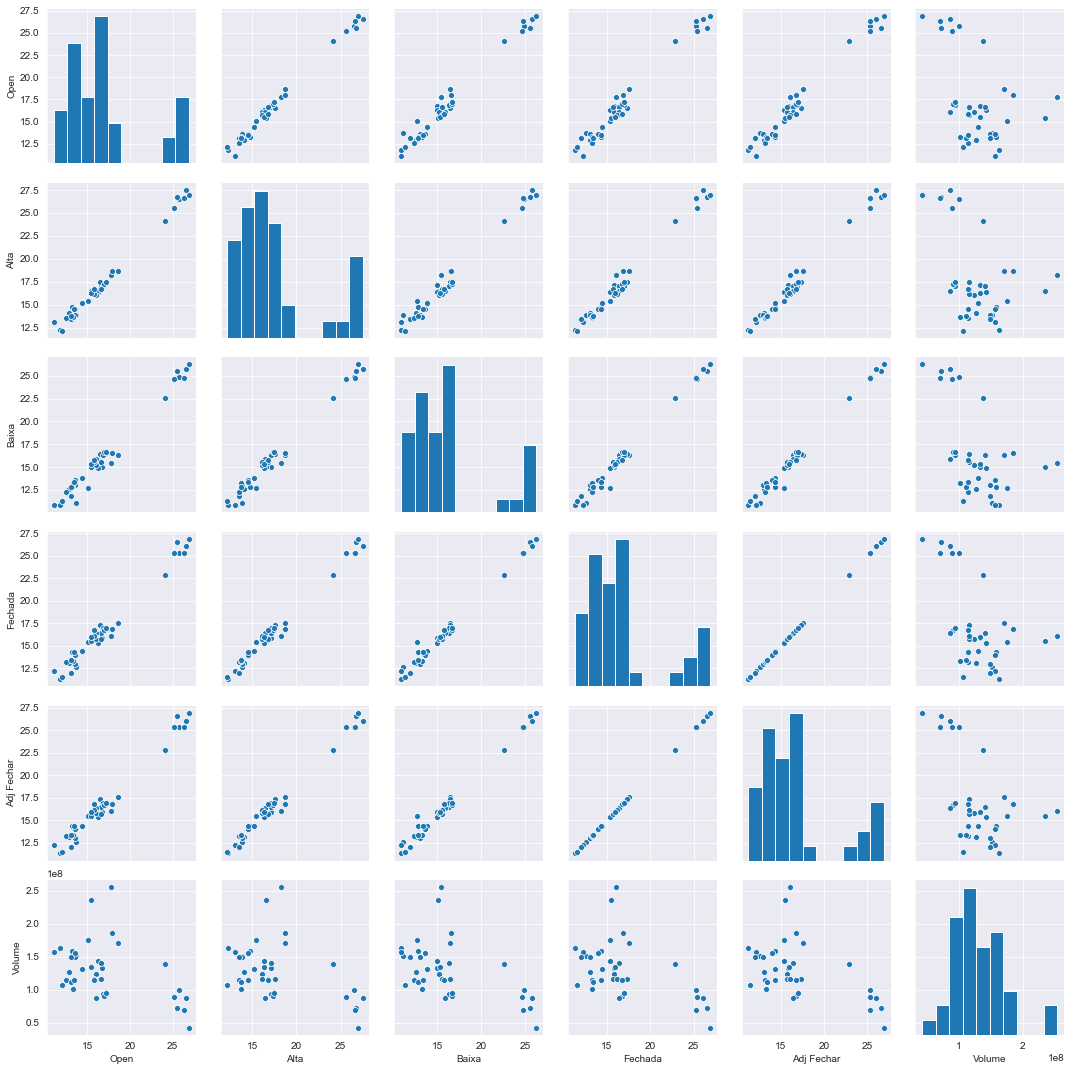

In [44]:
sns.pairplot(dados)

# Regressão linear

In [45]:
dados.corr()

,Open,Alta,Baixa,Fechada,Adj Fechar,Volume
Open,1.000000,0.994874,0.987215,0.986709,0.986709,-0.433654
Alta,0.994874,1.000000,0.989952,0.992585,0.992585,-0.425061
Baixa,0.987215,0.989952,1.000000,0.993617,0.993617,-0.506231
Fechada,0.986709,0.992585,0.993617,1.000000,1.000000,-0.490650
Adj Fechar,0.986709,0.992585,0.993617,1.000000,1.000000,-0.490652
Volume,-0.433654,-0.425061,-0.506231,-0.490650,-0.490652,1.000000


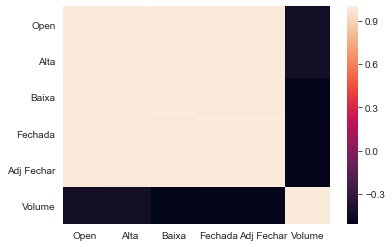

In [46]:
sns.heatmap(dados.corr())

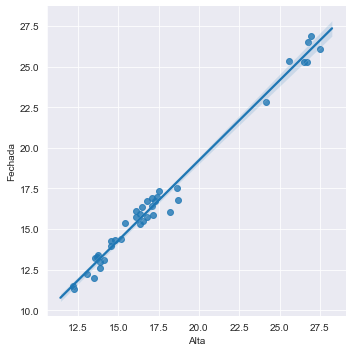

In [89]:
sns.lmplot(x="Alta", y="Fechada", data=dados)

In [47]:
x = dados["Alta"]
y = dados["Baixa"]

In [48]:
x

0     26.530001
1     25.559999
2     26.750000
3     27.480000
4     26.940001
5     26.670000
6     24.129999
7     18.230000
8     18.650000
9     17.129999
10    13.860000
11    15.400000
12    14.100000
13    13.840000
14    12.270000
15    13.070000
16    13.500000
17    12.180000
18    13.540000
19    14.790000
20    15.190000
21    13.690000
22    13.740000
23    14.540000
24    14.550000
25    16.549999
26    16.360001
27    16.100000
28    17.070000
29    17.530001
30    18.690001
31    17.090000
32    17.299999
33    16.469999
34    16.760000
35    16.129999
36    16.330000
37    16.750000
38    17.430000
Name: Alta, dtype: float64

In [49]:
y

0     24.889999
1     24.620001
2     25.480000
3     25.760000
4     26.240000
5     24.709999
6     22.549999
7     15.410000
8     16.370001
9     15.000000
10    11.080000
11    12.700000
12    12.550000
13    13.000000
14    10.870000
15    10.850000
16    11.830000
17    11.280000
18    12.280000
19    12.830000
20    13.810000
21    13.250000
22    12.830000
23    13.600000
24    13.320000
25    15.010000
26    14.930000
27    15.180000
28    16.340000
29    16.400000
30    16.500000
31    16.330000
32    16.610001
33    15.860000
34    15.530000
35    15.560000
36    15.340000
37    15.780000
38    16.620001
Name: Baixa, dtype: float64

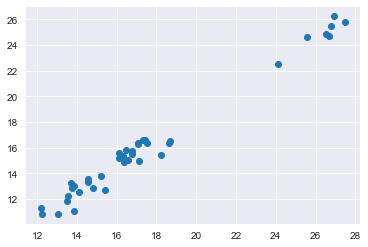

In [50]:
plt.scatter(x,y)

In [51]:
x1_alta = dados["Alta"]
x2_baixa = dados["Baixa"]

In [52]:
x1_alta

0     26.530001
1     25.559999
2     26.750000
3     27.480000
4     26.940001
5     26.670000
6     24.129999
7     18.230000
8     18.650000
9     17.129999
10    13.860000
11    15.400000
12    14.100000
13    13.840000
14    12.270000
15    13.070000
16    13.500000
17    12.180000
18    13.540000
19    14.790000
20    15.190000
21    13.690000
22    13.740000
23    14.540000
24    14.550000
25    16.549999
26    16.360001
27    16.100000
28    17.070000
29    17.530001
30    18.690001
31    17.090000
32    17.299999
33    16.469999
34    16.760000
35    16.129999
36    16.330000
37    16.750000
38    17.430000
Name: Alta, dtype: float64

In [53]:
x2_baixa

0     24.889999
1     24.620001
2     25.480000
3     25.760000
4     26.240000
5     24.709999
6     22.549999
7     15.410000
8     16.370001
9     15.000000
10    11.080000
11    12.700000
12    12.550000
13    13.000000
14    10.870000
15    10.850000
16    11.830000
17    11.280000
18    12.280000
19    12.830000
20    13.810000
21    13.250000
22    12.830000
23    13.600000
24    13.320000
25    15.010000
26    14.930000
27    15.180000
28    16.340000
29    16.400000
30    16.500000
31    16.330000
32    16.610001
33    15.860000
34    15.530000
35    15.560000
36    15.340000
37    15.780000
38    16.620001
Name: Baixa, dtype: float64

In [80]:
treino, teste, treino_alta, teste_baixo = train_test_split(x1_alta, x2_baixa)

In [81]:
x1_alta = np.array(x1_alta).reshape(len(x1_alta), 1)
x1_alta

array([[26.530001],
       [25.559999],
       [26.75    ],
       [27.48    ],
       [26.940001],
       [26.67    ],
       [24.129999],
       [18.23    ],
       [18.65    ],
       [17.129999],
       [13.86    ],
       [15.4     ],
       [14.1     ],
       [13.84    ],
       [12.27    ],
       [13.07    ],
       [13.5     ],
       [12.18    ],
       [13.54    ],
       [14.79    ],
       [15.19    ],
       [13.69    ],
       [13.74    ],
       [14.54    ],
       [14.55    ],
       [16.549999],
       [16.360001],
       [16.1     ],
       [17.07    ],
       [17.530001],
       [18.690001],
       [17.09    ],
       [17.299999],
       [16.469999],
       [16.76    ],
       [16.129999],
       [16.33    ],
       [16.75    ],
       [17.43    ]])

In [82]:
x2_baixa = np.array(x2_baixa).reshape(len(x2_baixa), 1)
x2_baixa

array([[24.889999],
       [24.620001],
       [25.48    ],
       [25.76    ],
       [26.24    ],
       [24.709999],
       [22.549999],
       [15.41    ],
       [16.370001],
       [15.      ],
       [11.08    ],
       [12.7     ],
       [12.55    ],
       [13.      ],
       [10.87    ],
       [10.85    ],
       [11.83    ],
       [11.28    ],
       [12.28    ],
       [12.83    ],
       [13.81    ],
       [13.25    ],
       [12.83    ],
       [13.6     ],
       [13.32    ],
       [15.01    ],
       [14.93    ],
       [15.18    ],
       [16.34    ],
       [16.4     ],
       [16.5     ],
       [16.33    ],
       [16.610001],
       [15.86    ],
       [15.53    ],
       [15.56    ],
       [15.34    ],
       [15.78    ],
       [16.620001]])

# Modelo de regressão linear 

In [83]:
regressor = LinearRegression()

regressor.fit(x1_alta, x2_baixa)
modelo = LinearRegression()
modelo.fit(x1_alta, x2_baixa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
modelo.intercept_

array([-1.26136124])

In [85]:
modelo.coef_

array([[0.99326845]])

In [86]:
modelo.coef_ * 27.74456356 + modelo.intercept_

array([[26.29643838]])

Text(0, 0.5, 'Açãoes Baixa')

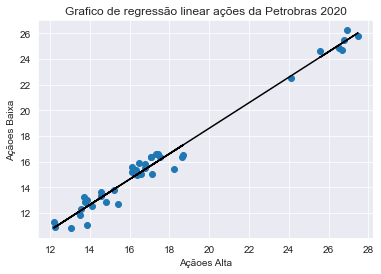

In [101]:
# Grafico
plt.scatter(x1_alta, x2_baixa)
plt.plot(x1_alta, regressor.predict(x1_alta), color = "black")

plt.title("Grafico de regressão linear ações da Petrobras 2020")
plt.xlabel("Açãoes Alta")
plt.ylabel("Açãoes Baixa")

# Modelo 2 com RMSE, MSE, MAE

In [94]:
treino, teste, treino_alta, teste_baixo = train_test_split(x1_alta, x2_baixa, test_size=0.20)

In [95]:
x1_alta

array([[26.530001],
       [25.559999],
       [26.75    ],
       [27.48    ],
       [26.940001],
       [26.67    ],
       [24.129999],
       [18.23    ],
       [18.65    ],
       [17.129999],
       [13.86    ],
       [15.4     ],
       [14.1     ],
       [13.84    ],
       [12.27    ],
       [13.07    ],
       [13.5     ],
       [12.18    ],
       [13.54    ],
       [14.79    ],
       [15.19    ],
       [13.69    ],
       [13.74    ],
       [14.54    ],
       [14.55    ],
       [16.549999],
       [16.360001],
       [16.1     ],
       [17.07    ],
       [17.530001],
       [18.690001],
       [17.09    ],
       [17.299999],
       [16.469999],
       [16.76    ],
       [16.129999],
       [16.33    ],
       [16.75    ],
       [17.43    ]])

In [96]:
x2_baixa

array([[24.889999],
       [24.620001],
       [25.48    ],
       [25.76    ],
       [26.24    ],
       [24.709999],
       [22.549999],
       [15.41    ],
       [16.370001],
       [15.      ],
       [11.08    ],
       [12.7     ],
       [12.55    ],
       [13.      ],
       [10.87    ],
       [10.85    ],
       [11.83    ],
       [11.28    ],
       [12.28    ],
       [12.83    ],
       [13.81    ],
       [13.25    ],
       [12.83    ],
       [13.6     ],
       [13.32    ],
       [15.01    ],
       [14.93    ],
       [15.18    ],
       [16.34    ],
       [16.4     ],
       [16.5     ],
       [16.33    ],
       [16.610001],
       [15.86    ],
       [15.53    ],
       [15.56    ],
       [15.34    ],
       [15.78    ],
       [16.620001]])

In [97]:
modelo_10 = LinearRegression()
modelo_10.fit(x1_alta, x2_baixa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
modelo_10.score(x1_alta, x2_baixa)

0.9800045824582613

# Modelo M.L regressão linear

**RMSE**

In [99]:
rmse = np.sqrt(mean_squared_error(x1_alta, x2_baixa))
print("Erro quadrático médio da raiz:", rmse)

Erro quadrático médio da raiz: 1.5168734627686884


**MAE**

In [100]:
mae = mean_absolute_error(x1_alta, x2_baixa)
print("Erro médio absoluto:", mae)

Erro médio absoluto: 1.379230692307692


**MSE**

In [79]:
mse = mean_squared_error(x1_alta, x2_baixa)
print("Erro médio quadrático:", mse)

Erro médio quadrático: 2.3009051020518716


Text(0, 0.5, 'Açãoes Baixa')

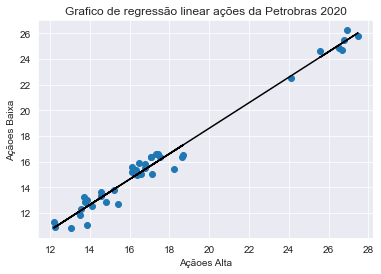

In [102]:
plt.scatter(x1_alta, x2_baixa)
plt.plot(x1_alta, regressor.predict(x1_alta), color = "black")

plt.title("Grafico de regressão linear ações da Petrobras 2020")
plt.xlabel("Açãoes Alta")
plt.ylabel("Açãoes Baixa")